In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
df= pd.read_csv('./textfiles/HPRICE2.raw',delim_whitespace=True, header=None,  names=['price', 'crime', 'nox', 'rooms', 'dist', 'radial', 'proptax', 'stratio', 'lowstat', 'lprice', 'lnox', 'lproptax'])

#### 1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased. 

* The errors in the linear regression are uncorolated : $ Cov(\epsilon_i,\epsilon_j) = 0, \forall i \neq j $
* They have the same variance (homoscedastic) : $ Var(\epsilon_i) = \sigma^2 < \infty, \forall i $
* They all have a mean of zero : $ E[\epsilon_i] = 0, \forall i  $ 



#### 2. Show that under this assumption the OLS estimators are indeed unbiased.

$ y = X\beta + \epsilon $ and we estimate $\beta$ with $\hat\beta = (X^TX)^{-1}X^Ty$


$$ 

\begin{equation}
    \begin{aligned}
        E[\hat\beta] & = E[(X^TX)^{-1}X^Ty] \\
        & = E[(X^TX)^{-1}X^T(X\beta+\epsilon)] \\
        & = E[(X^TX)^{-1}X^TX\beta] + E[(X^TX)^{-1}X^T\epsilon) & \text{linearity of E} \\
        & = \beta + XE[\epsilon] \\
        &=  \beta & \text{as $E[\epsilon] = 0$ }

    \end{aligned}

\end{equation}

$$


#### 3. Explain the sample selection bias with an example from the course. 

The selection bias refers to a specific bias where your data (population) is not representative of the real data. The example given in class is about planes returning from war zones. People realised that plane returning from war zones had really specific area where they had been shot during their mission. They then upprgraded those planes to be more protected at these specifics areas to ensure less plane crash in combat. What they did not realised was that the plane comming home were not representative of the whole population wich implied a selection bias and therefore a bad conclusion. Indeed, the planes that crashed were not part of the selection for obvious reason. A more thourough reasoning would have been to protect the area where the plane that did come back were not shot as the one where they were shot did not affect their returning

#### 4. Explain the omitted variable bias with an example from the course

Ommited variable bias occurs when a variable wich has impact on the response variable (the Y variable), and is corrolated to the other variables in our statistical analysis is not taken into account. The example in class we talked about was regarding crops. If our mean is to improve our yield and we only look at fertilizer consumption data. We are missing the fact that lands have different quality for production. The land quality definitely have an impact on yield (wich is our mean) and it might also have an impact on fertilizer use. Farmer might prefer to put fertilizer on better land quality as it might improve its yield.

#### 5. Explain the problem of multicollinearity. Is it a problem in this dataset? 

If more than 2 columns of X are (nearly) linearly dependent , then $det(X^TX) = 0$ (or close to it) and it won't have an invert. In our case it means that it is gonna be numerically hard to compute the invert from $X^TX$

In more simple terms multicollinearity happens when two variables measure the exact same thing. (We can determine a variable directly based on another one (or close to it)



In [104]:
y = df["price"]
X = df.iloc[:, 1:9]
log = df.iloc[:, 9:]


In [105]:
print('We compute det(X^T*X) =', np.linalg.det((X.T @ X)), ', the value is far from 0. Multicollinearity won t be a problem in our case as it will not make the invert computation harder')

We compute det(X^T*X) = 1.3888028105785238e+31 , the value is far from 0. Multicollinearity won t be a problem in our case as it will not make the invert computation harder


#### 6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-39%, 40%-60%, 61%-100% 
#### 7. Compute for each category of nox level the average median price and comment on your results 


In [106]:
lowNox = df['price'][ df['nox'] <= np.percentile(df['nox'], 39)]
mediumNox = df['price'][ df['nox'] <= np.percentile(df['nox'], 60)][df['nox'] >= np.percentile(df['nox'], 40)]
highNox = df['price'][ df['nox'] >= np.percentile(df['nox'], 61) ]

print( "Price median for lowNox :", np.median(lowNox))
print( "for mediumNox :", np.median(mediumNox))
print( "for highNox :", np.median(highNox))

Price median for lowNox : 24399.0
for mediumNox : 20400.0
for highNox : 16300.0


It seems like Nox and price are anti-corolated as high Nox implies a low median price and conversely for low Nox 

#### 8. Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect? 


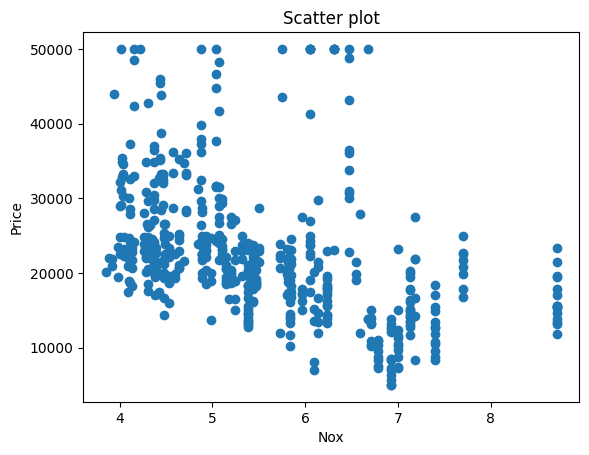

In [107]:
fig, ax = plt.subplots()

plt.scatter(df['nox'],y)
plt.title('Scatter plot')
plt.xlabel('Nox')
plt.ylabel('Price')
plt.show()

It is hard to determine if it is a ceteris paribus effect. However it seems like there is an underlying variable corolated to Nox wich impacts price as Nox at first glance should not have any impact on housing price. It is most likely not a ceteris paribus effect

#### 9. Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on thehistogram of the residuals. Interpret all coefficients. 


In [108]:
X

,crime,nox,rooms,dist,radial,proptax,stratio,lowstat
0,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98
1,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14
2,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03
3,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94
4,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33
...,...,...,...,...,...,...,...,...
501,0.063,5.73,6.59,2.48,1,27.3,21.0,9.67
502,0.045,5.73,6.12,2.29,1,27.3,21.0,9.08
503,0.061,5.73,6.98,2.17,1,27.3,21.0,5.64
504,0.110,5.73,6.79,2.39,1,27.3,21.0,6.48


(array([  5.,  60., 253., 143.,  28.,   9.,   1.,   3.,   3.,   1.]),
 array([-16712.04251196, -10968.94852357,  -5225.85453518,    517.23945321,
          6260.3334416 ,  12003.42742999,  17746.52141838,  23489.61540677,
         29232.70939517,  34975.80338356,  40718.89737195]),
 <BarContainer object of 10 artists>)

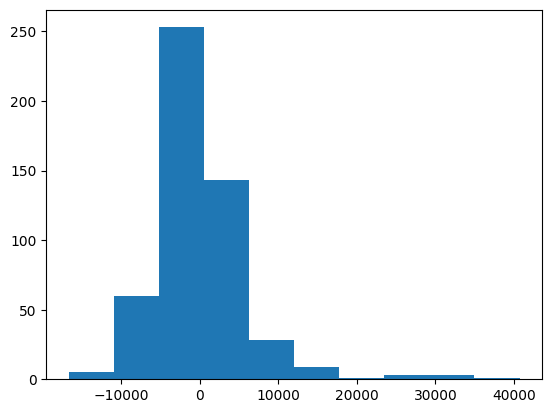

In [109]:
const= np.ones(y.shape)
X1 = X.drop(['dist','radial','stratio','lowstat'], axis = 1)
X1['const'] = const

beta = np.linalg.inv(X1.T @ X1)@X1.T@y
residual = y - np.array(X1) @ beta
plt.hist(residual)

In [110]:
beta, X1

(0     -136.543828
 1     -660.467247
 2     7797.928603
 3      -89.414396
 4   -18682.263753
 dtype: float64,
      crime   nox  rooms  proptax  const
 0    0.006  5.38   6.57     29.6    1.0
 1    0.027  4.69   6.42     24.2    1.0
 2    0.027  4.69   7.18     24.2    1.0
 3    0.032  4.58   7.00     22.2    1.0
 4    0.069  4.58   7.15     22.2    1.0
 ..     ...   ...    ...      ...    ...
 501  0.063  5.73   6.59     27.3    1.0
 502  0.045  5.73   6.12     27.3    1.0
 503  0.061  5.73   6.98     27.3    1.0
 504  0.110  5.73   6.79     27.3    1.0
 505  0.047  5.73   6.03     27.3    1.0
 
 [506 rows x 5 columns])

All negative values implies that they lower the housing price, they have a negative impact (const < nox < crime < proptax < 0). The only variable having a postive impact on price is the number of rooms, if we do not consider the constant variable, room is the one with the most effect on housing price for our estimator by a factor of 10. We also have to consider that all these values don't have the same metric wich means it is harder to compare one to another. The const beta value may represents the none observable variable, but it also allow our linear estimator to not pass through 0 when all variables are.

#### 10. Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients. 


(array([  7.,  13.,  52., 222., 167.,  30.,   7.,   3.,   2.,   3.]),
 array([-0.89876179, -0.66779897, -0.43683615, -0.20587332,  0.0250895 ,
         0.25605232,  0.48701514,  0.71797796,  0.94894078,  1.17990361,
         1.41086643]),
 <BarContainer object of 10 artists>)

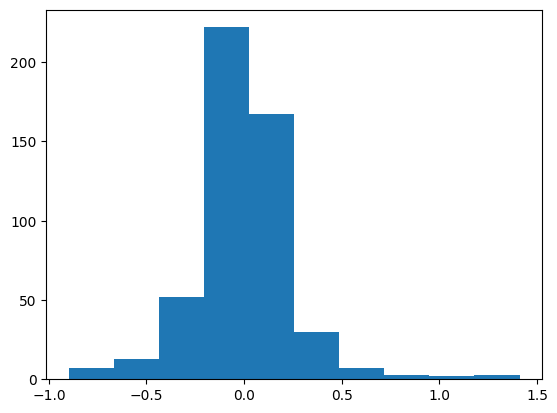

In [111]:
y2 = log['lprice']
X2 = X1

beta = np.linalg.inv(X2.T @ X2)@X2.T@y2
residual = y2 - np.array(X2) @ beta
plt.hist(residual)

In [112]:
X2,beta

(     crime   nox  rooms  proptax  const
 0    0.006  5.38   6.57     29.6    1.0
 1    0.027  4.69   6.42     24.2    1.0
 2    0.027  4.69   7.18     24.2    1.0
 3    0.032  4.58   7.00     22.2    1.0
 4    0.069  4.58   7.15     22.2    1.0
 ..     ...   ...    ...      ...    ...
 501  0.063  5.73   6.59     27.3    1.0
 502  0.045  5.73   6.12     27.3    1.0
 503  0.061  5.73   6.98     27.3    1.0
 504  0.110  5.73   6.79     27.3    1.0
 505  0.047  5.73   6.03     27.3    1.0
 
 [506 rows x 5 columns],
 0   -0.012516
 1   -0.047579
 2    0.281556
 3   -0.004263
 4    8.655011
 dtype: float64)

#### 11. Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the histogram of the residuals. Interpret all coefficients. 


(array([  7.,  11.,  53., 223., 168.,  29.,   7.,   3.,   2.,   3.]),
 array([-0.90195187, -0.67115532, -0.44035877, -0.20956222,  0.02123434,
         0.25203089,  0.48282744,  0.71362399,  0.94442054,  1.1752171 ,
         1.40601365]),
 <BarContainer object of 10 artists>)

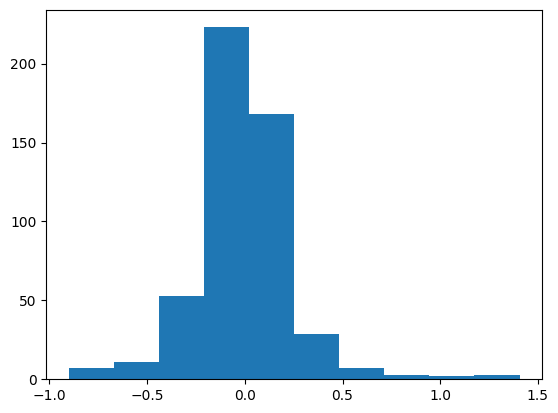

In [113]:
X3 = X2.drop(['nox','proptax'], axis = 1)
X3['lnox'] = log['lnox']
X3['lproptax'] = log['lproptax']
y3 = y2 

beta = np.linalg.inv(X3.T @ X3)@X3.T@y3
residual = y3 - np.array(X3) @ beta
plt.hist(residual)

#### 12. In the specification of question 10, test the hypothesis H0: $\beta_{nox}$ >0 vs. H1: $\beta_{nox}$ < 0 at the 10% level